In [9]:
## 畫圖前置
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import requests
from pprint import pprint 
import re
import seaborn as sns

url = "https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_"
response = requests.get(url)
if response.status_code == 200:
    with open("TaipeiSansTCBeta-Regular.ttf", "wb") as file:
        file.write(response.content)
else:
    print("Download failed. Status code:", response.status_code)
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

list_1 = ["0","情人橋","淡水美麗新影城","家樂福淡新店", "淡水老街廣場", "淡水碼頭", "淡水海關碼頭"]
for i, site1 in enumerate(list_1):
    if i == 0: 
        continue
    data = pd.read_csv(f"/Users/chriskeng/Documents/112課程/資科導/期末專案/text_comment/All/{site1}.csv")
    globals()[f"{list_1[i]}_df"] = pd.DataFrame(data)


In [4]:
# list_1 = ["0","情人橋","淡水美麗新影城","家樂福淡新店", "淡水老街廣場", "淡水碼頭", "淡水海關碼頭"]
# df = [評論,星級,時間]
groups = 情人橋_df.groupby(by='時間')
print(groups.size())

時間
1 個月前      69
1 天前        2
1 年前      178
1 週前       14
10 個月前     50
11 個月前     48
2 個月前      56
2 天前        4
2 週前       26
3 個月前      56
3 天前        4
3 週前       20
4 個月前      42
4 天前        2
5 個月前      43
5 天前        1
6 個月前      55
6 天前        1
7 個月前      58
8 個月前      58
9 個月前      63
dtype: int64


WordCloud saved at: /Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/折線圖-一年之內-2.jpg


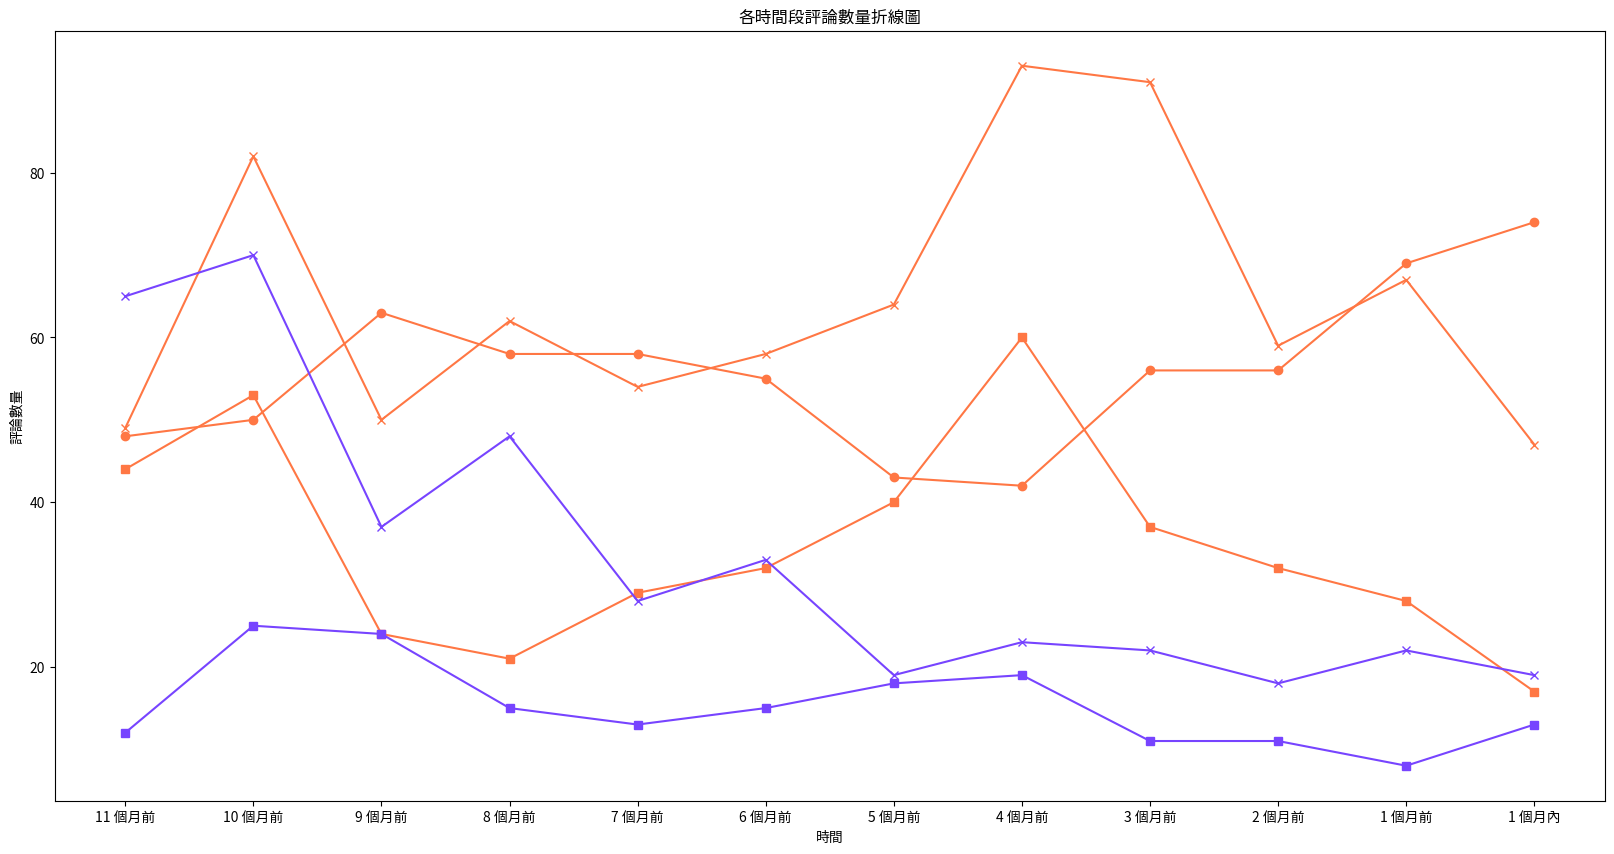

In [11]:
# 1年以內
# 自定義映射函數將 'x天前'、'x週前' 轉換為 '第1個月'
def map_time(time):
    if '分鐘前' in time or '小時前'in time or '天前' in time or '週前' in time:
        return '1 個月內'
    elif '年前' in time:  # 若是 "一年前" 就回傳 None
        return None
    else:
        return time

plt.figure(figsize=(20, 10))
# list_1 = ["0","情人橋","淡水美麗新影城","家樂福淡新店", "淡水老街廣場", "淡水碼頭", "淡水海關碼頭"]
#情人橋
情人橋_df['新時間'] = 情人橋_df['時間'].apply(map_time)
group_1 = 情人橋_df.groupby(by='新時間')
淡水美麗新影城_df['新時間'] = 淡水美麗新影城_df['時間'].apply(map_time)
group_2 = 淡水美麗新影城_df.groupby(by='新時間')
家樂福淡新店_df['新時間'] = 家樂福淡新店_df['時間'].apply(map_time)
group_3 = 家樂福淡新店_df.groupby(by='新時間')
淡水老街廣場_df['新時間'] = 淡水老街廣場_df['時間'].apply(map_time)
group_4 = 淡水老街廣場_df.groupby(by='新時間')
淡水碼頭_df['新時間'] = 淡水碼頭_df['時間'].apply(map_time)
group_5 = 淡水碼頭_df.groupby(by='新時間')
淡水海關碼頭_df['新時間'] = 淡水海關碼頭_df['時間'].apply(map_time)
group_6 = 淡水海關碼頭_df.groupby(by='新時間')

#也需要更改
group_1_counts = group_1.size()
Count_1_df = group_1_counts.reset_index(name='Count')
group_2_counts = group_2.size()
Count_2_df = group_2_counts.reset_index(name='Count')
group_3_counts = group_3.size()
Count_3_df = group_3_counts.reset_index(name='Count')
group_4_counts = group_4.size()
Count_4_df = group_4_counts.reset_index(name='Count')
group_5_counts = group_5.size()
Count_5_df = group_5_counts.reset_index(name='Count')
group_6_counts = group_6.size()
Count_6_df = group_6_counts.reset_index(name='Count')

# 注意value要對
custom_order = ["11 個月前", "10 個月前", "9 個月前", "8 個月前", "7 個月前", "6 個月前",
                "5 個月前", "4 個月前", "3 個月前", "2 個月前", "1 個月前", "1 個月內"]
# 將 '新時間' 轉換為 Categorical 並指定排序順序
Count_1_df['新時間'] = pd.Categorical(Count_1_df['新時間'], categories=custom_order, ordered=True)
Count_2_df['新時間'] = pd.Categorical(Count_2_df['新時間'], categories=custom_order, ordered=True)
Count_3_df['新時間'] = pd.Categorical(Count_3_df['新時間'], categories=custom_order, ordered=True)
Count_4_df['新時間'] = pd.Categorical(Count_4_df['新時間'], categories=custom_order, ordered=True)
Count_5_df['新時間'] = pd.Categorical(Count_5_df['新時間'], categories=custom_order, ordered=True)
Count_6_df['新時間'] = pd.Categorical(Count_6_df['新時間'], categories=custom_order, ordered=True)
# 按照指定順序排序
Count_1_df = Count_1_df.sort_values('新時間')
Count_2_df = Count_2_df.sort_values('新時間')
Count_3_df = Count_3_df.sort_values('新時間')
Count_4_df = Count_4_df.sort_values('新時間')
Count_5_df = Count_5_df.sort_values('新時間')
Count_6_df = Count_6_df.sort_values('新時間')

# 繪製折線圖
# list_1 = ["0","情人橋","淡水美麗新影城","家樂福淡新店", "淡水老街廣場", "淡水碼頭", "淡水海關碼頭"]
plt.plot(Count_1_df['新時間'], Count_1_df['Count'],color = "#FF7744", marker='o', linestyle='-')
plt.plot(Count_2_df['新時間'], Count_2_df['Count'],color = "#FF7744", marker='s', linestyle='-')
plt.plot(Count_3_df['新時間'], Count_3_df['Count'],color = "#FF7744", marker='x', linestyle='-')

#plt.plot(Count_4_df['新時間'], Count_4_df['Count'],color = "#7744FF", marker='o', linestyle='-')
plt.plot(Count_5_df['新時間'], Count_5_df['Count'],color = "#7744FF", marker='s', linestyle='-')
plt.plot(Count_6_df['新時間'], Count_6_df['Count'],color = "#7744FF", marker='x', linestyle='-')

# 設定標題及標籤
plt.title('各時間段評論數量折線圖')
plt.xlabel('時間')
plt.ylabel('評論數量')

file_name = "折線圖-一年之內-2.jpg"
save_path = f"/Users/chriskeng/Documents/112課程/資科導/期末專案/時間分組/{file_name}"
# 保存為 JPG 格式
plt.savefig(save_path, format="jpg")
print(f"WordCloud saved at: {save_path}")

# 顯示圖表
plt.show()